In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print("The first image, all pixels shown is:\n",x_train[0,:,:])
print("\n")
print("The target label of the first picture is:",y_train[0])

The first image, all pixels shown is:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0

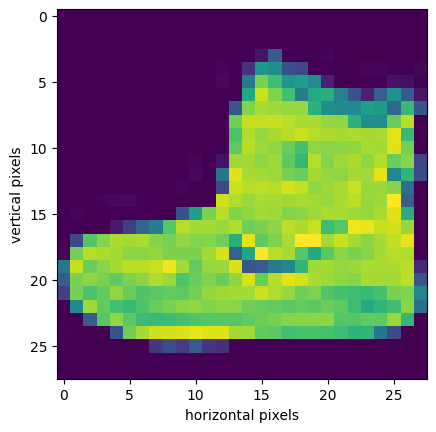

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('horizontal pixels')
plt.ylabel('vertical pixels')
plt.imshow(x_train[0,:,:])     # [image index, vertical pixels, horizontal pixels]

In [ ]:
values, idx = tf.unique(y_train)

In [ ]:
print("Y labels are:",values)

Y labels are: tf.Tensor([9 0 3 2 7 5 1 6 4 8], shape=(10,), dtype=uint8)


In [ ]:
print(idx)

tf.Tensor([0 1 1 ... 2 1 5], shape=(60000,), dtype=int32)


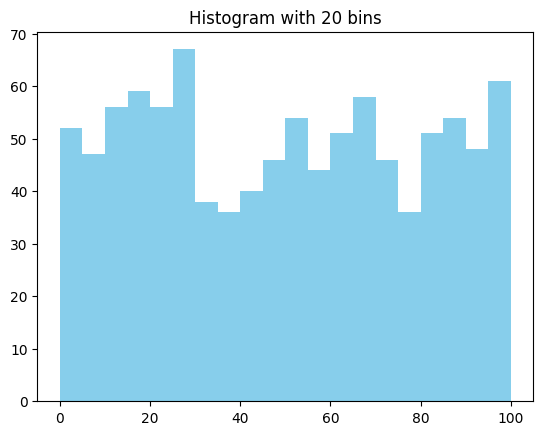

In [ ]:
import numpy as np
data = np.random.randint(0, 101, size=1000)  # Random integers from 0 to 100

plt.hist(data, bins=20, color = 'skyblue')
plt.title('Histogram with 20 bins')
plt.show()

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

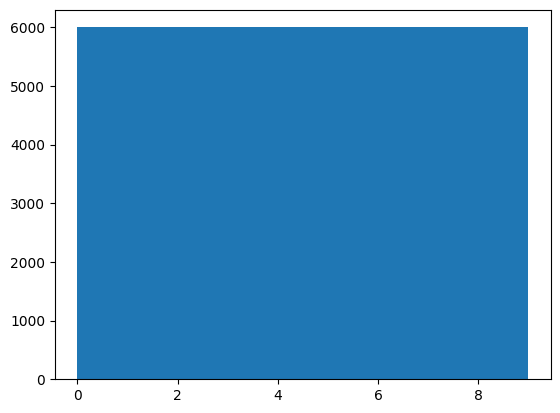

In [ ]:
plt.hist(y_train, bins = 10)

(array([6000.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0., 6000.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

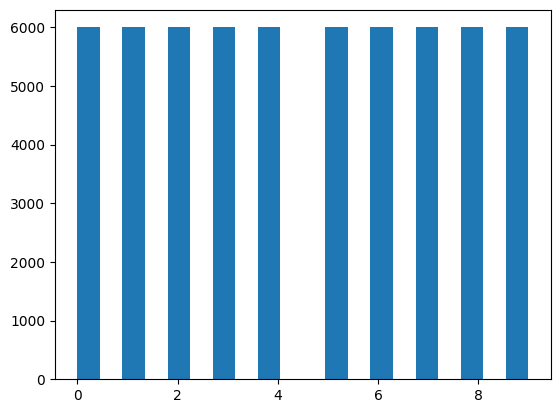

In [ ]:
plt.hist(y_train,bins=20)

In [ ]:
from sklearn import model_selection as ms

In [ ]:
x_train,x_val,y_train,y_val= ms.train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,y_train.shape)
print('\n')
print(x_val.shape,y_val.shape)

(48000, 28, 28) (48000,)


(12000, 28, 28) (12000,)


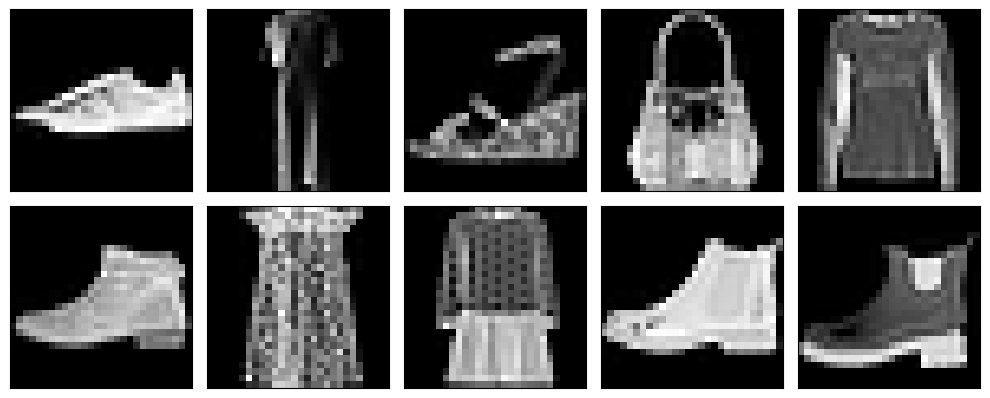

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, int(i + 1))
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])  # removes the vertical lines (grid) in the pictures
    plt.yticks([])  # removes horizontal lines or ticks
plt.tight_layout()
plt.show()


In [ ]:
# sample example
t = [[1, 2, 3],
     [4, 5, 6]]
t

[[1, 2, 3], [4, 5, 6]]

In [ ]:
tf.reshape(t, (-1))
t

[[1, 2, 3], [4, 5, 6]]

In [ ]:
print(tf.reshape(t, [-1]))

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
x_train=tf.reshape(x_train,(-1,784))
x_val=tf.reshape(x_val,(-1,784))
x_test=tf.reshape(x_test,(-1,784))

In [ ]:
x_train.shape

TensorShape([48000, 784])

In [ ]:
input_size=784
output_size=10
hidden_1_shape=128
hidden_2_shape=64
hidden_3_shape=32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax

In [ ]:
# building model by stacking layers
model=Sequential([
                  Dense(hidden_1_shape,input_shape=(int(input_size),),activation="sigmoid"),

                  Dense(hidden_2_shape,activation="sigmoid"),

                  Dense(hidden_3_shape,activation="sigmoid"),

                  Dense(output_size),

                  Softmax()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.build(input_shape=(None, input_size))

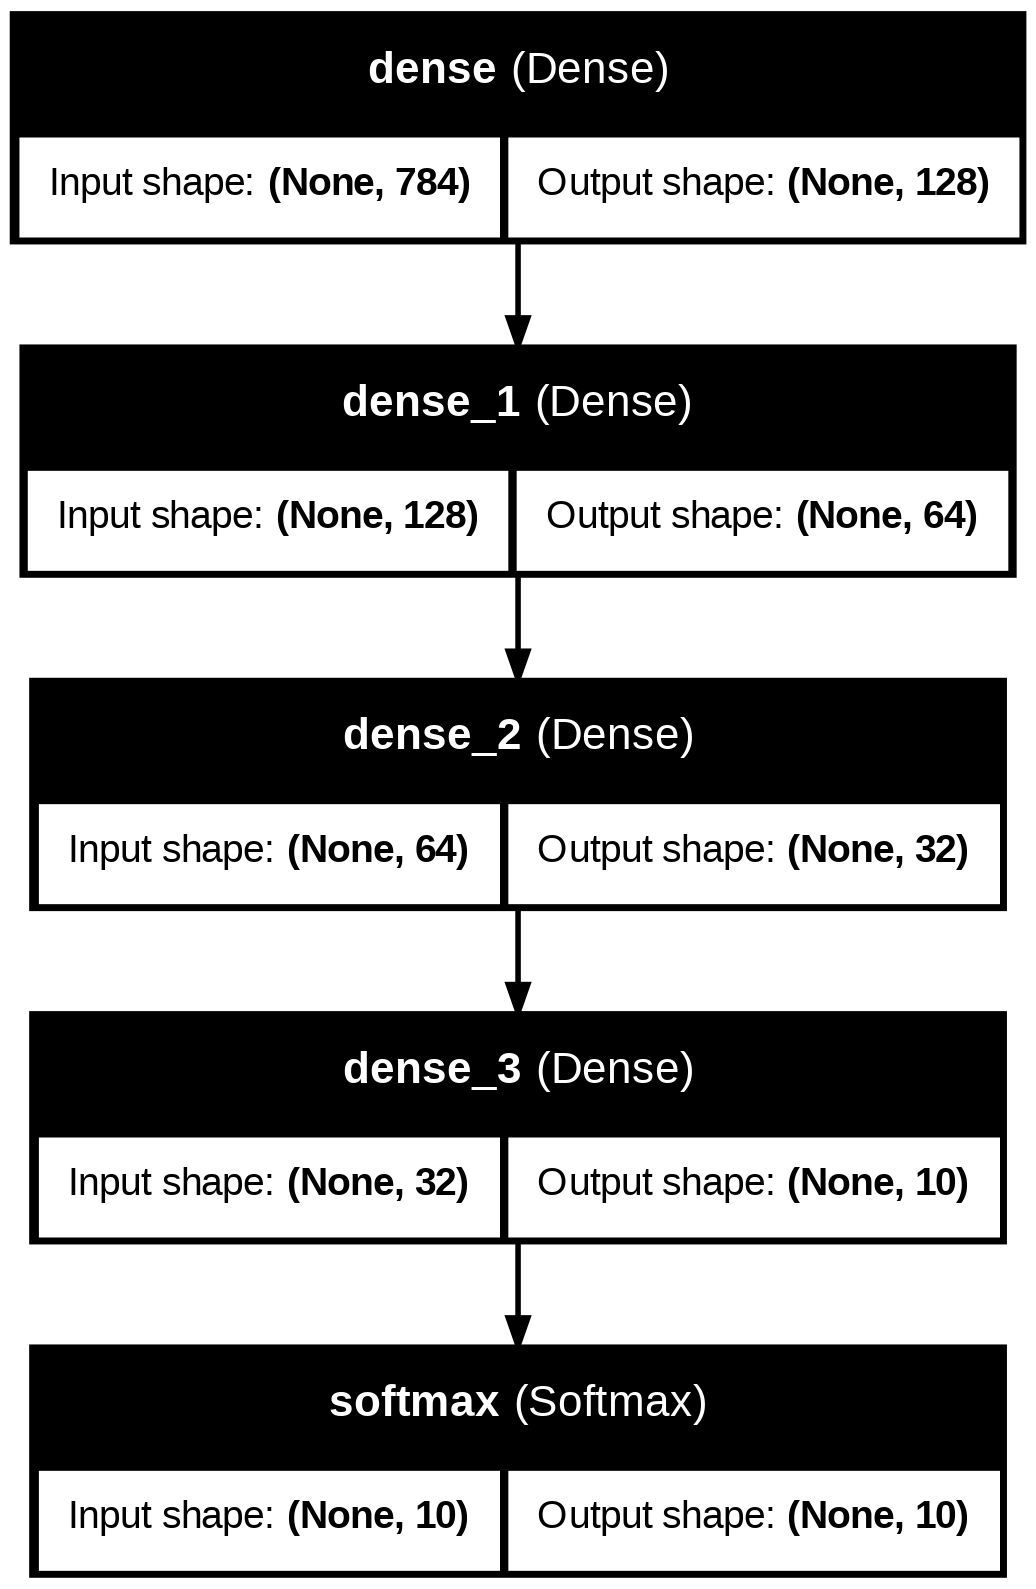

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the image
from IPython.display import Image
Image('model.png')

In [ ]:
#from keras_sequential_ascii import keras2ascii
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [tf.keras.callbacks.TensorBoard('logs')]

In [ ]:
history = model.fit(x_train,y_train,batch_size=128,
          validation_data=(x_val,y_val),epochs=200, callbacks = callbacks)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4401 - loss: 1.7823 - val_accuracy: 0.6248 - val_loss: 0.9635
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6806 - loss: 0.8840 - val_accuracy: 0.6950 - val_loss: 0.8151
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7130 - loss: 0.7670 - val_accuracy: 0.7177 - val_loss: 0.7516
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7280 - loss: 0.7048 - val_accuracy: 0.7284 - val_loss: 0.6898
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7350 - loss: 0.6787 - val_accuracy: 0.7437 - val_loss: 0.6574
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7521 - loss: 0.6628 - val_accuracy: 0.7591 - val_loss: 0.6680
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7459 - loss: 0.6578 - val_accuracy: 0.7450 - val_loss: 0.6542
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7550 - loss: 0.6409 - val_a

In [ ]:
print(history.history)
print(history.history['loss'])        # training loss
print(history.history['accuracy'])    # training accuracy

{'accuracy': [0.5428541898727417, 0.6960208415985107, 0.7190208435058594, 0.726687490940094, 0.737416684627533, 0.7494791746139526, 0.7512916922569275, 0.7532708048820496, 0.7524166703224182, 0.7673958539962769, 0.7788541913032532, 0.7693541646003723, 0.7751874923706055, 0.765666663646698, 0.7603124976158142, 0.7743124961853027, 0.7783750295639038, 0.773812472820282, 0.7846666574478149, 0.7825833559036255, 0.7752708196640015, 0.7748333215713501, 0.7657708525657654, 0.7770208120346069, 0.7789166569709778, 0.7916666865348816, 0.7910208106040955, 0.7941458225250244, 0.7833333611488342, 0.7994791865348816, 0.7945208549499512, 0.7991458177566528, 0.7932291626930237, 0.7996875047683716, 0.7912499904632568, 0.7981874942779541, 0.804437518119812, 0.7988541722297668, 0.7984166741371155, 0.7989374995231628, 0.801645815372467, 0.8106666803359985, 0.8028333187103271, 0.7978333234786987, 0.7988749742507935, 0.8103541731834412, 0.8103333115577698, 0.7980416417121887, 0.8027916550636292, 0.8052291870

In [ ]:
print(history.history['val_loss'])          # validation loss
print(history.history['val_accuracy'])      # validation accuracy

[0.9635037183761597, 0.8150600790977478, 0.7516046762466431, 0.6898421049118042, 0.6574459075927734, 0.6679633855819702, 0.6541691422462463, 0.665846586227417, 0.6132407784461975, 0.6310186386108398, 0.6089001893997192, 0.6379380226135254, 0.5868732333183289, 0.6367852091789246, 0.6191636919975281, 0.5931713581085205, 0.5872392058372498, 0.5808874368667603, 0.6008164882659912, 0.5808947682380676, 0.6051548719406128, 0.5881237387657166, 0.6571641564369202, 0.5871552228927612, 0.5733575820922852, 0.5958396792411804, 0.5868129134178162, 0.5797523260116577, 0.5583633780479431, 0.5793721675872803, 0.5760826468467712, 0.5861972570419312, 0.5647671222686768, 0.5415322184562683, 0.5629655122756958, 0.5640339255332947, 0.5363211035728455, 0.5356854796409607, 0.5680110454559326, 0.5541355609893799, 0.5655707716941833, 0.5333274602890015, 0.5550997853279114, 0.5645835399627686, 0.5599455833435059, 0.5198293924331665, 0.5478472113609314, 0.5616003274917603, 0.5248706340789795, 0.5448178052902222, 

Text(0, 0.5, 'Loss')

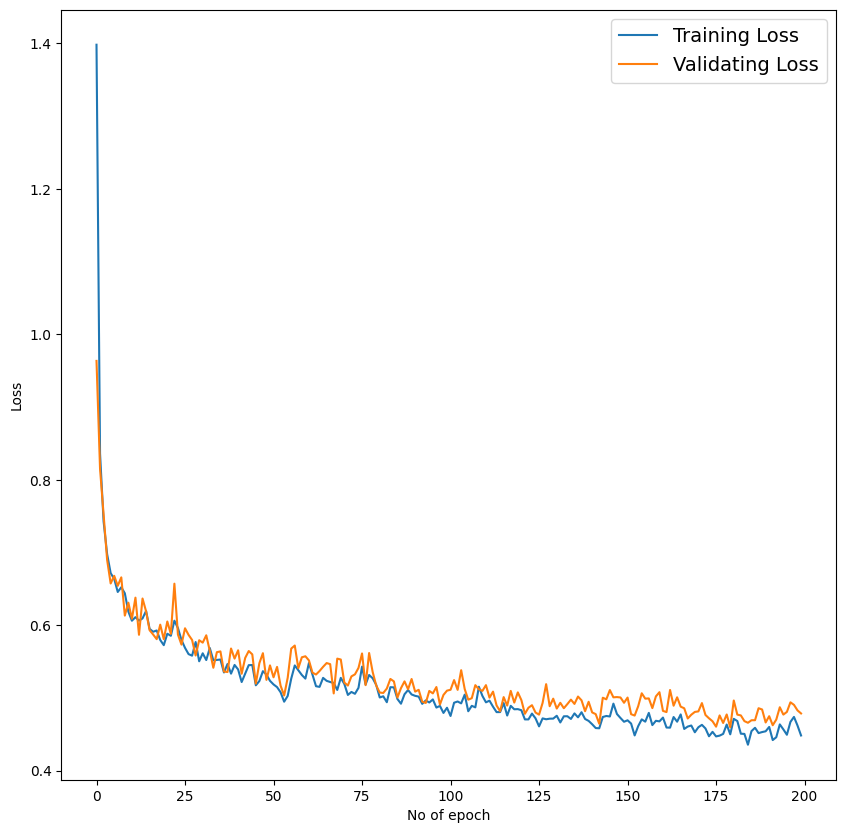

In [ ]:
plt.figure(figsize=(10,10))

x = tf.range(0,200)
plt.plot(x,history.history['loss'], label='Training Loss')
plt.plot(x,history.history['val_loss'], label='Validating Loss')
plt.legend(loc='upper right',fontsize=14)

plt.xlabel('No of epoch')
plt.ylabel('Loss')

In [ ]:
# Get the number of samples
num_samples_train = x_train.shape[0]
num_samples_val = x_val.shape[0]
num_samples_test = x_test.shape[0]

print(num_samples_train)
print(num_samples_val)
print(num_samples_test)

48000
12000
10000


In [ ]:
x_train_2d=tf.reshape(x_train,(48000,28,28))
x_val_2d=tf.reshape(x_val,(12000,28,28))
x_test_2d=tf.reshape(x_test,(10000,28,28))

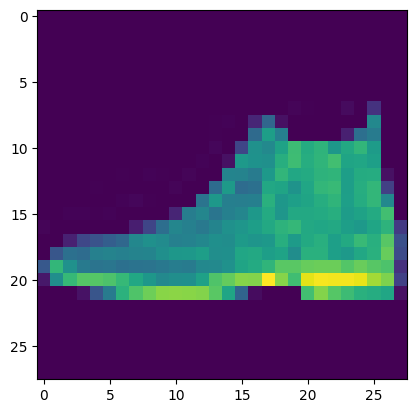

In [ ]:
plt.imshow(x_test_2d[0,:,:])

In [ ]:
print(y_test[0])

9


In [ ]:
# Predicting a single sample
sample = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[1.4578232e-07 9.6424613e-12 6.3802965e-08 1.5966355e-10 2.1691215e-09
  4.4304430e-02 8.0311533e-05 3.2577258e-02 4.5243817e-04 9.2258531e-01]]


In [ ]:
predicted_class = np.argmax(model.predict(sample))
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
9


In [ ]:
loss,accuracy = model.evaluate(x=x_test, y=y_test, batch_size=128,verbose=2)

print('\nTest accuracy:', accuracy)

79/79 - 0s - 3ms/step - accuracy: 0.8260 - loss: 0.4946

Test accuracy: 0.8259999752044678


In [ ]:
# #############        All Code         ##################




# # Combine all the code in a single cell
# from IPython import get_ipython
# from IPython.display import display, Image

# # Install necessary libraries
# !pip install tensorflow==2.15.0 scikit-learn==1.3.2 matplotlib==3.7.1 numpy==1.24.3 keras-sequential-ascii==0.4.1

# # Import libraries
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Softmax
# import kagglehub
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import model_selection as ms
# from tensorflow.keras.utils import plot_model
# from keras_sequential_ascii import keras2ascii

# # Load dataset
# # Note: kagglehub.dataset_download("zalando-research/fashionmnist") downloads the dataset,
# # but the standard tf.keras.datasets.fashion_mnist.load_data() is used for loading in this code.
# # The kagglehub download line is kept to reflect the original notebook structure.
# path = kagglehub.dataset_download("zalando-research/fashionmnist")
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# # Print dataset shapes
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

# # Print example image and label
# print("The first image, all pixels shown is:\n", x_train[0, :, :])
# print("\n")
# print("The target label of the first picture is:", y_train[0])

# # Display example image
# plt.xlabel('horizontal pixels')
# plt.ylabel('vertical pixels')
# plt.imshow(x_train[0, :, :])
# plt.show()

# # Analyze labels
# values, idx = tf.unique(y_train)
# print("Y labels are:", values)
# print(idx)

# # Plot label distribution
# plt.hist(y_train, bins=10)
# plt.title('Histogram of Fashion-MNIST Labels (10 bins)')
# plt.show()

# plt.hist(y_train, bins=20)
# plt.title('Histogram of Fashion-MNIST Labels (20 bins)')
# plt.show()

# # Split training data into training and validation sets
# x_train, x_val, y_train, y_val = ms.train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# # Print shapes after split
# print(x_train.shape, y_train.shape)
# print('\n')
# print(x_val.shape, y_val.shape)

# # Display some training images
# plt.figure(figsize=(10, 10))
# for i in range(10):
#     plt.subplot(5, 5, int(i + 1))
#     plt.imshow(x_train[i], cmap='gray')
#     plt.xticks([])  # removes the vertical lines (grid) in the pictures
#     plt.yticks([])  # removes horizontal lines or ticks
# plt.tight_layout()
# plt.show()

# # Reshape image data
# x_train = tf.reshape(x_train, (-1, 784))
# x_val = tf.reshape(x_val, (-1, 784))
# x_test = tf.reshape(x_test, (-1, 784))

# # Print shapes after reshaping
# print(x_train.shape)

# # Define model parameters
# input_size = 784
# output_size = 10
# hidden_1_shape = 128
# hidden_2_shape = 64
# hidden_3_shape = 32

# # Build the model
# model = Sequential([
#     Dense(hidden_1_shape, input_shape=(int(input_size),), activation="sigmoid"),
#     Dense(hidden_2_shape, activation="sigmoid"),
#     Dense(hidden_3_shape, activation="sigmoid"),
#     Dense(output_size),
#     Softmax()
# ])

# # Build the model with a sample input shape
# model.build(input_shape=(None, input_size))

# # Plot the model architecture
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# # Display the model plot
# display(Image('model.png'))

# # Print model summary
# model.summary()
# keras2ascii(model) # Using keras2ascii for ASCII summary as seen in the original notebook

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Print model summary after compile (no change in summary)
# model.summary()

# # Set up TensorBoard callback
# callbacks = [tf.keras.callbacks.TensorBoard('logs')]

# # Train the model
# history = model.fit(x_train, y_train, batch_size=128,
#                     validation_data=(x_val, y_val), epochs=200, callbacks=callbacks)

# # Print training history
# print(history.history)
# print(history.history['loss'])        # training loss
# print(history.history['accuracy'])    # training accuracy
# print(history.history['val_loss'])          # validation loss
# print(history.history['val_accuracy'])      # validation accuracy

# # Plot loss curves
# plt.figure(figsize=(10, 10))
# x = tf.range(0, 200)
# plt.plot(x, history.history['loss'], label='Training Loss')
# plt.plot(x, history.history['val_loss'], label='Validating Loss')
# plt.legend(loc='upper right', fontsize=14)
# plt.xlabel('No of epoch')
# plt.ylabel('Loss')
# plt.show()

# # Get number of samples in each set
# num_samples_train = x_train.shape[0]
# num_samples_val = x_val.shape[0]
# num_samples_test = x_test.shape[0]

# print(num_samples_train)
# print(num_samples_val)
# print(num_samples_test)

# # Reshape data back to 2D for visualization (if needed)
# x_train_2d = tf.reshape(x_train, (48000, 28, 28))
# x_val_2d = tf.reshape(x_val, (12000, 28, 28))
# x_test_2d = tf.reshape(x_test, (10000, 28, 28))

# # Display a test image and its true label
# plt.imshow(x_test_2d[0, :, :])
# plt.show()
# print(y_test[0])

# # Predict on a single sample
# sample = np.expand_dims(x_test[0], axis=0)
# prediction = model.predict(sample)
# print(prediction)

# predicted_class = np.argmax(model.predict(sample))
# print(predicted_class)

# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(x=x_test, y=y_test, batch_size=128, verbose=2)
# print('\nTest accuracy:', accuracy)



In [ ]:
#################################### ************************* #####################



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Predict on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8260
Precision: 0.8258
Recall: 0.8260
F1 Score: 0.8243

Confusion Matrix:
[[832   8  13  36   2   1  94   0  14   0]
 [ 19 913  11  52   2   0   1   0   2   0]
 [ 13   4 774  10 115   0  79   0   5   0]
 [ 72   6   6 829  36   1  46   0   4   0]
 [  5   2 168  27 694   0  96   0   8   0]
 [  1   0   0   0   0 916   0  47   5  31]
 [225   3 144  32  95   0 482   0  19   0]
 [  0   0   0   0   0  18   0 928   0  54]
 [  3   0  14   5   4   5   9   5 955   0]
 [  0   0   0   0   0  17   0  45   1 937]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1000
           1       0.98      0.91      0.94      1000
           2       0.68      0.77      0.73      1000
           3       0.84      0.83      0.83      1000
           4       0.73      0.69      0.71      1000
           5       0.96      0.92      0.94      1000
           6       0.60      0.48      

In [ ]:
###Starting Lab 4

# model1 = Sequential()

# model1.add(Conv2D(filters = 6, kernel_size=(5,5), strides = (1,1), padding = 'valid', activation ='relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))

# model1.add(Conv2D(filters = 16, kernel_size=(5, 5), activation='relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))

# model1.add(Flatten())

# model1.add(Dense(120, activation='relu'))
# model1.add(Dense(84, activation='relu'))
# model1.add(Dense(10, activation='softmax'))

import torch
import torch.nn as nn
import torch.nn.functional as F


class Lenet(nn.Module):
  def __init__(self,num_classes):
    super(Lenet,self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),stride=1)
    self.activate1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=(2,2))
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),stride=1)
    self.activate2=nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=(2,2))
    self.conv3 = nn.Conv2d(in_channels=16,out_channels=120,kernel_size=(5,5),stride=1)
    self.flatten1=nn.Flatten()
    self.linear1 = nn.Linear(in_features=120,out_features=84)
    self.flatten2=nn.Flatten()
    self.linear2 = nn.Linear(in_features=84,out_features=num_classes)





model=Lenet(10)
model

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (activate1): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (activate2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (flatten2): Flatten(start_dim=1, end_dim=-1)
  (linear2): Linear(in_features=84, out_features=10, bias=True)
)